## PREPROCESSING

1. Remove inappropriate games
2. Remove rows that are not games
3. plots before PP
4. Removing NaN values
5. droping the columns
6. categorical to numerical
7. plots
8. Remove outliers
9. scaling
10. PCA
11. plots

---

CLUSTERING


### Imports


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from main_functions import *

### Loading the dataset


In [ ]:
df = pd.read_csv("games.csv")
df.head()
df.describe()
df.columns

In [ ]:
# 85102
# 77625
#

labels = "Unappropriate entries", "Utilities", "Appropriate entries"
sizes = np.array([(85102 - 77625), 4000, 77625]) / 85102
explode = (0.1, 0.1, 0)

fig, ax = plt.subplots()
ax.set_title("Unappropriate entries, appropriate entries and utilities distribution")
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

In [4]:
# Count occurrences for each word removed
# word_counts = {word: 0 for word in inappropriate_words}

# for word in inappropriate_words:
#     pattern = re.compile(r"\b" + re.escape(word) + r"\b", re.IGNORECASE)
#     word_counts[word] = df.apply(
#         lambda row: sum(
#             pattern.search(str(row[col])) is not None for col in columns_to_check
#         ),
#         axis=1,
#     ).sum()

# # Plotting the results
# plt.figure(figsize=(10, 6))
# bars = plt.bar(word_counts.keys(), word_counts.values(), color="skyblue")

# # Add labels on top of the bars
# for bar in bars:
#     height = bar.get_height()
#     plt.text(
#         bar.get_x() + bar.get_width() / 2,
#         height,
#         f"{int(height)}",
#         ha="center",
#         va="bottom",
#     )

# plt.xlabel("Words Removed")
# plt.ylabel("Number of Rows Containing the Word")
# plt.title("Number of Rows Removed Containing Each Word")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

### Removing the inappropriate games


In [ ]:
# Filter out rows that contain any word in the specified columns
df_filtered = df[~df.apply(contains_inappropriate_word, axis=1)]
df = df_filtered
df.shape
# Display the filtered dataset
# df_filtered

### Removing rows that are not games


In [6]:
## removing rows that are not games

### Plots


In [ ]:
# Create the histogram plot for Price
ax = df["Price"].plot(kind="hist", bins=20, title="Price Distribution")

# Annotate the bars with the respective count values
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
    )

# Show the plot
plt.show()

In [ ]:
# Filter the data to zoom in on Price <= 200
df_filtered = df[df["Price"] <= 200]

# Replot the scatter plot for Price vs Estimated Owners (Price <= 200)
df_filtered.plot(
    kind="scatter",
    x="Price",
    y="Estimated owners",
    title="Price vs Estimated Owners (Price <= 200)",
)
plt.show()

In [ ]:
# Summary statistics for Price
price_summary = df["Price"].describe()
print(price_summary)

In [ ]:
# Create bins for Price ranges
df["Price Range"] = pd.cut(
    df["Price"],
    bins=[0, 50, 100, 150, 200, 500, 1000],
    labels=["0-50", "51-100", "101-150", "151-200", "201-500", "501+"],
)

# Count the number of games in each price range
price_range_counts = df["Price Range"].value_counts().sort_index()
print(price_range_counts)

# Plot the distribution of games across price ranges
ax = sns.barplot(x=price_range_counts.index, y=price_range_counts.values)

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
    )

plt.title("Number of Games in Each Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Games")
plt.show()

In [ ]:
# Create the bar plot for the distribution of games by Required age
ax = (
    df["Required age"]
    .value_counts()
    .plot(kind="bar", title="Game Count by Required Age")
)

# Annotate the bars with the respective count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

In [ ]:
# Bar chart for positive and negative reviews
df[["Positive", "Negative"]].sum().plot(
    kind="bar", title="Total Positive vs Negative Reviews"
)
plt.show()

In [ ]:
# Scatter plot for Price vs. Average playtime forever
df.plot(
    kind="scatter",
    x="Price",
    y="Average playtime forever",
    title="Price vs. Average Playtime Forever",
)
plt.show()

In [ ]:
# Filter to zoom in on Price range between 0 and 200
df_filtered = df[df["Price"] <= 200]

# Plot the filtered data
df_filtered.plot(
    kind="scatter",
    x="Price",
    y="Average playtime forever",
    title="Price vs Average Playtime Forever (0-200)",
)
plt.show()

In [ ]:
# Plot the number of games released per year
df["release_year"] = df['Release date'].str.extract(r'(\d{4})').astype(int)
df["release_year"].value_counts().sort_index().plot(
    kind="bar", title="Games Released per Year"
)
plt.show()

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count
print(missing_values)

In [17]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Create a heatmap to visualize missing values
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title('Missing Values Heatmap')
# plt.show()

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values
ax = missing_values.plot(
    kind="bar", title="Missing Values per Column", ylabel="Count of Missing Values"
)
plt.xticks(rotation=45, ha="right")

# Annotate each bar with the number of missing values
for i, v in enumerate(missing_values):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom")

plt.show()

In [ ]:
# Summarize the number of games that support each platform (True values indicate support)
platform_support = df[["Windows", "Mac", "Linux"]].apply(
    lambda x: x.value_counts().get(True, 0)
)

# Create a bar plot with the number annotated on top of each bar
ax = platform_support.plot(
    kind="bar",
    title="Comparison of Game Support for Windows, Mac, and Linux",
    ylabel="Number of Games Supported",
)
plt.xticks(rotation=0)

# Annotate the bars with the values
for i, v in enumerate(platform_support):
    ax.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.show()

In [ ]:
# Count the number of `False` values in each platform column (Windows, Mac, Linux)
platform_no_support = df[["Windows", "Mac", "Linux"]].apply(
    lambda x: (x == False).sum()
)

# Create a bar plot with the number of games that do not support each platform
ax = platform_no_support.plot(
    kind="bar",
    title="Games Without Support for Windows, Mac, and Linux",
    ylabel="Number of Games Not Supported",
)
plt.xticks(rotation=0)

# Annotate the bars with the count of `False` values
for i, v in enumerate(platform_no_support):
    ax.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.show()

In [ ]:
# Zoom in on Price range between 0 and 200
df_price_filtered = df[df["Price"] <= 200]
df_price_filtered.plot(
    kind="scatter", x="Price", y="User score", title="User Score vs Price (0-200)"
)
plt.show()

In [ ]:
# Correlation heatmap
corr = df[
    [
        "Price",
        "User score",
        "Metacritic score",
        # "Estimated owners",
        # "Reviews",
        "Positive",
        "Negative",
        "Average playtime forever",
    ]
].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

In [23]:
# import seaborn as sns

# # Pair plot for key variables related to clustering
# sns.pairplot(df[['User score', 'Price', 'Estimated owners', 'Average playtime forever']])
# plt.title('Pair Plot of Key Features')
# plt.show()

In [ ]:
# Assuming 'Supported languages' is a column with comma-separated language values
df["Supported languages"] = df["Supported languages"].fillna("")

# Split the languages into separate rows (explode)
df_languages = df.assign(
    Supported_languages=df["Supported languages"].str.split(",")
).explode("Supported_languages")

# Strip any leading/trailing spaces
df_languages["Supported_languages"] = df_languages["Supported_languages"].str.strip()

# Get the count of each language
language_counts = df_languages["Supported_languages"].value_counts()
print(language_counts)

In [ ]:
# Plot the top 10 most common languages
top_languages = language_counts.head(10)
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title("Top 10 Most Common Supported Languages")
plt.xlabel("Number of Games")
plt.ylabel("Language")
plt.show()
###############################################################################################

In [ ]:
# Assuming 'Genres' is a column with comma-separated values
df["Genres"] = df["Genres"].fillna("")

# Split the genres into separate rows (explode)
df_genres = df.assign(Genres=df["Genres"].str.split(",")).explode("Genres")

# Strip any leading/trailing spaces
df_genres["Genres"] = df_genres["Genres"].str.strip()

# Get the count of each genre
genre_counts = df_genres["Genres"].value_counts()

print(genre_counts)

# Plot the top 10 most common genres
top_genres = genre_counts.head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genres")
plt.show()

In [ ]:
# Group by Genres and calculate the average price for each genre
# avg_price_per_genre = (
#     df_genres.groupby("Genres")["Price"].mean(.so)rt_values(ascending=False)
# )

genres_to_plot = ["Indie", "Action", "Casual", "Adventure", "Strategy", "Simulation", "RPG", "Early Access", "Free to Play", "Sports"]  # specify your desired genres

# Group by Genres and calculate the average price for each genre
avg_price_per_genre = (
    df_genres.groupby("Genres")["Price"].mean().sort_values(ascending=False)
)

# Filter for the specified genres
filtered_avg_price = avg_price_per_genre[avg_price_per_genre.index.isin(genres_to_plot)]


# Plot the top 10 genres with the highest average price
sns.barplot(x=filtered_avg_price.values, y=filtered_avg_price.index)
# sns.barplot(x=avg_price_per_genre.head(20).values, y=avg_price_per_genre.head(20).index)
plt.title("Average Price per Genre")
plt.xlabel("Average Price")
plt.ylabel("Genres")
plt.show()

In [ ]:
# Create bins for Price ranges
df_genres["Price Range"] = pd.cut(
    df_genres["Price"],
    bins=[0, 50, 100, 150, 200, 500, 1000],
    labels=["0-50", "51-100", "101-150", "151-200", "201-500", "501+"],
)

# Count how many games fall within each Price Range for each Genre
price_range_genre_count = (
    df_genres.groupby(["Price Range", "Genres"]).size().unstack().fillna(0)
)

# Plot the count of games for each Genre across Price Ranges
price_range_genre_count.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Price Range Distribution Across Genres")
plt.xlabel("Price Range")
plt.ylabel("Number of Games")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Pair plot to explore relationships between Price and other variables
sns.scatterplot(data=df, x="Price", y="Metacritic score")
# plt.title("Pair Plot of Price and Related Variables")
plt.show()

In [ ]:
# Pair plot to explore relationships between Price and other variables
sns.scatterplot(data=df_price_filtered, x="Price", y="Metacritic score")
# plt.title("Pair Plot of Price and Related Variables")
plt.show()

In [ ]:
categories = []
for item in df["Genres"].tolist():
    categories.extend(item.split(","))
set(categories)
df.loc[df["Genres"].str.contains("Utilities")]

### Removing NaN values


In [ ]:
df = handle_missing_values(df)
df.isnull().values.any()

### Droping the columns


In [33]:
columns_to_drop = [
    "AppID",
    "Full audio languages",
    "Header image",
    "Website",
    "Support url",
    "Support email",
    "Metacritic url",
    "Score rank",
    "Achievements",
    "Screenshots",
    "Movies",
]
df = df_filtered.drop(columns=columns_to_drop, errors='ignore')

### Categorical to numerical


In [ ]:
df.dtypes

# estimated owners - convert
# About the game - drop
# Supported languages - drop
# reviews - drop
# windoes - drop
# linux - drop
# mac - drop
# notes - drop
# developers - drop
# publishers - drop

In [35]:
df = add_release_season_column(df)
df = convert_estimated_owners_to_midpoints(df)
df = add_review_columns(df)
df = add_online_offline_column(df)
df = add_player_type_numeric_column(df)

In [36]:
# test = df_filtered.select_dtypes(exclude=['object'])
# test.dtypes

In [37]:
# df_filtered.isnull().values.any()
# lista = df_filtered.columns[df_filtered.isna().any()].tolist()
# lista
# df_filtered[lista].to_csv("poop.csv")

### Removing the outliers


In [38]:
# only keep columns with numerical data
n_neighbors = 20
df_numeric = df[['Peak CCU', 'Required age', 'Price', 'DLC count', 'Windows', 'Mac',
    'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative',
    'Recommendations', 'Average playtime forever',
    'Average playtime two weeks', 'Median playtime forever',
    'Median playtime two weeks']]

# broad outliers detection
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
df_filtered = clf.fit_predict(df_numeric)
df = df[df_filtered != -1]

all_genres = get_set_of_all_genres(df)

def func(row):
    # if type(row["Genres"]) is not str:
    #     print(f'{row["Genres"]}, {row["Name"]}, {type(row["Genres"])}')
    return set(str(row["Genres"]).split(',')) == all_genres

# specific outliers detection
# remove any game that happens to have all the possible genres
df_filtered = df.apply(func, axis=1)
df = df[~df_filtered]
# df = remove_outliers(df)

In [ ]:
# Count occurrences for each word removed
word_counts = {word: 0 for word in inappropriate_words}

for word in inappropriate_words:
    pattern = re.compile(r"\b" + re.escape(word) + r"\b", re.IGNORECASE)
    word_counts[word] = df.apply(
        lambda row: sum(
            pattern.search(str(row[col])) is not None for col in columns_to_check
        ),
        axis=1,
    ).sum()

# Plotting the results
plt.figure(figsize=(10, 6))
bars = plt.bar(word_counts.keys(), word_counts.values(), color="skyblue")

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
    )

plt.xlabel("Words Removed")
plt.ylabel("Number of Rows Containing the Word")
plt.title("Number of Rows Removed Containing Each Word")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# df_filtered["release_year"] = pd.to_numeric(
#     df_filtered["release_year"], errors="coerce"
# )
# games_after_2020 = df_filtered[df_filtered["release_year"] > 2020]
# num_games_after_2020 = len(games_after_2020)
# print(f"Number of games released after 2015: {num_games_after_2020}")
df.dtypes

### Scaling


In [49]:
# code for scaling
df = df.drop(columns=["release_season_num"])
df = scaling(df.select_dtypes(include=["number"]), "minmax")

### PCA


Selected features: Index(['Peak CCU', 'Required age', 'Price', 'DLC count', 'Metacritic score',
       'User score', 'Positive', 'Negative', 'Recommendations',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks',
       'estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric'],
      dtype='object')
Explained variance ratio: [0.43505909 0.37011341 0.08904667 0.07292329]
Cumulative explained variance ratio: [0.43505909 0.8051725  0.89421916 0.96714246]
[[-0.03610011  0.31006044  0.44983961 -0.30774122]
 [ 0.23988459 -0.26947693 -0.06872018 -0.02813079]
 [-0.57836932  0.1178449   0.05160731 -0.02194483]
 ...
 [-0.57900737  0.11781627  0.05077607 -0.02283145]
 [-0.57849818  0.11783874  0.0514383  -0.02212685]
 [-0.57773248  0.11787254  0.05243414 -0.02106731]]


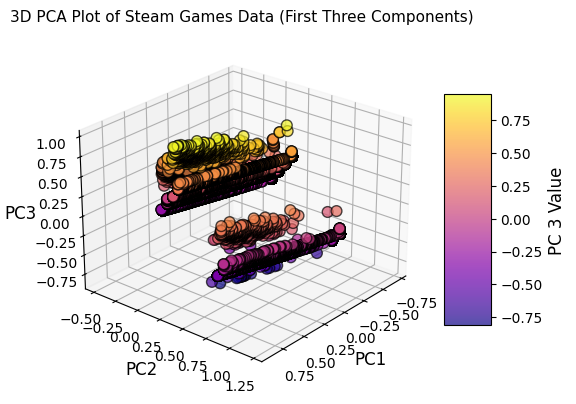

In [53]:
# Code for 
# df.isnull().values.any()
# df.columns[df.isna().any()].tolist()
pca, _ = implement_PCA(df, df.columns)
print(pca)
plot_PCA(pca)